# Image Processing Using Opencv 
---
### Install Opencv
- Example on MacOS
```console  
$ pip3 --version
pip 24.0 from /opt/anaconda3/lib/python3.12/site-packages/pip (python 3.12)
$ python3 --version
Python 3.12.4
$ pip3 install opencv-python
Collecting opencv-python
  Downloading opencv-python-4.11.0.86.tar.gz (95.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 MB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Requirement already satisfied: numpy>=1.21.2 in /opt/anaconda3/lib/python3.12/site-packages (from opencv-python) (1.26.4)
Building wheels for collected packages: opencv-python
  Building wheel for opencv-python (pyproject.toml) ... done
  Created wheel for opencv-python: filename=opencv_python-4.11.0.86-cp312-cp312-macosx_10_16_x86_64.whl size=27595148 sha256=0fc6f3f12d5b5f0a5a54d870de9e866aaf59484b11dfcce77a8aece5a4f393e9
  Stored in directory: /Users/bshen2/Library/Caches/pip/wheels/be/bd/d5/425eca52f204ab4b1ad7ac23c79e7a0458ee178056e4350265
Successfully built opencv-python
Installing collected packages: opencv-python
Successfully installed opencv-python-4.11.0.86
```
---
### Filtering through Convolution
Let's use convolution for the following image processing:
- Edge Detection
- Feature Extraction
- Blurring &rarr; Scaling

### Import resources and display image

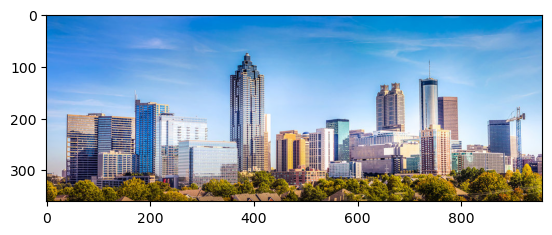

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('building2.jpg')

plt.imshow(image)

### Convert the image to grayscale

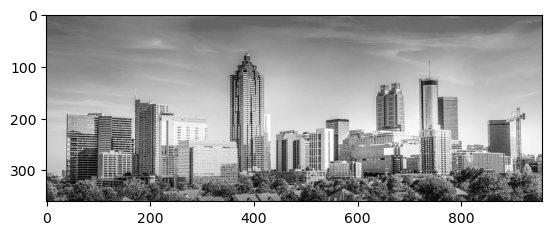

In [4]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Convolution Through a Kernel

Image convolution is a mathematical operation where a small matrix (called a kernel or filter) slides over an image, performing element-wise multiplications and summing the results to produce a new pixel value. This process helps extract features such as edges, textures, and patterns by emphasizing specific spatial structures in the image. Convolution is widely used in image processing and deep learning, particularly in convolutional neural networks (CNNs) for feature detection.

Here we practice applying image convolution using traditional image processing operations.
1. **Select a Kernel (Filter):** Choose a small matrix (e.g., 3x3 or 5x5) with predefined values for a specific operation (e.g., edge detection, blurring).  

2. **Slide the Kernel Over the Image:** Move the kernel across the image, covering one region at a time.  

3. **Compute the Element-Wise Product:** Multiply each value in the kernel with the corresponding pixel values in the image region.  

4. **Sum the Products:** Add up all the multiplied values to obtain a single new pixel value.  

5. **Store the Result:** Place the computed value into the corresponding location in the output image.  

6. **Repeat for Entire Image:** Continue the process by shifting the kernel until every pixel has been processed.

Here is a common 3×3 kernel for edge detection, which detects edges in a specific direction, vertical and horizontal:

**Vertical Edge Detection Kernel:**
>$
K_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$

**Horizontal Edge Detection Kernel:**
>$
K_y =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$

These kernels are convolved with an image to highlight vertical and horizontal edges, respectively.

Applying a filter like this to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. 

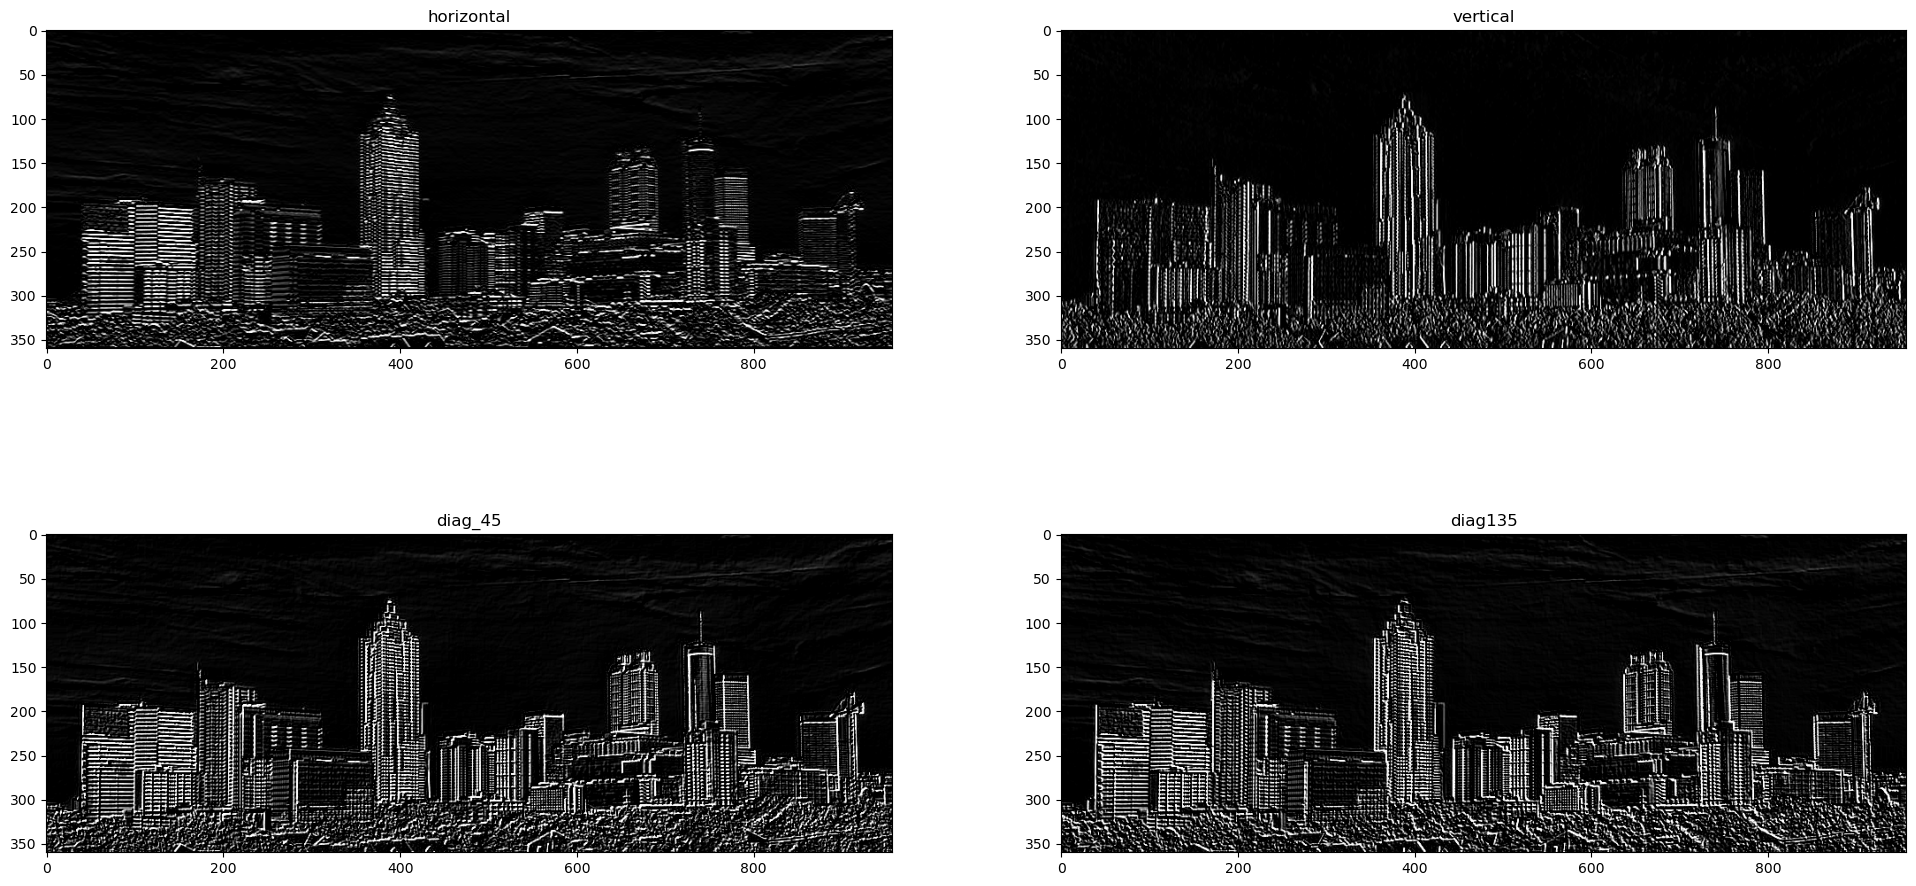

In [5]:
# Create a custom kernel

# 3x3 array for edge detection
horizon = np.array([[ -1, -1, -1], 
                    [  0,  0,  0], 
                    [  1,  1,  1]])

## TODO: Create and apply a vertical edge detection operator
vertica = np.array([[ -1, 0, 1], 
                    [ -1, 0, 1], 
                    [ -1, 0, 1]])

diag_45 = np.array([[ -2, -1, 0], 
                    [ -1,  0, 1], 
                    [  0,  1, 2]])

diag135 = np.array([[ 0, -1, -2], 
                    [ 1,  0, -1], 
                    [ 2,  1,  0]])

fig = plt.figure(figsize=(24,24))
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, horizon)
fig.add_subplot(2,2,1)
plt.imshow(filtered_image, cmap='gray')
plt.title('horizontal')

filtered_image2 = cv2.filter2D(gray, -1, vertica)
fig.add_subplot(2,2,2)
plt.imshow(filtered_image2, cmap='gray')
plt.title('vertical')

filtered_image3 = cv2.filter2D(gray, -1, diag_45)
fig.add_subplot(1,2,1)
plt.imshow(filtered_image3, cmap='gray')
plt.title('diag_45')

filtered_image4 = cv2.filter2D(gray, -1, diag135)
fig.add_subplot(1,2,2)
plt.imshow(filtered_image4, cmap='gray')
plt.title('diag135')

plt.show()

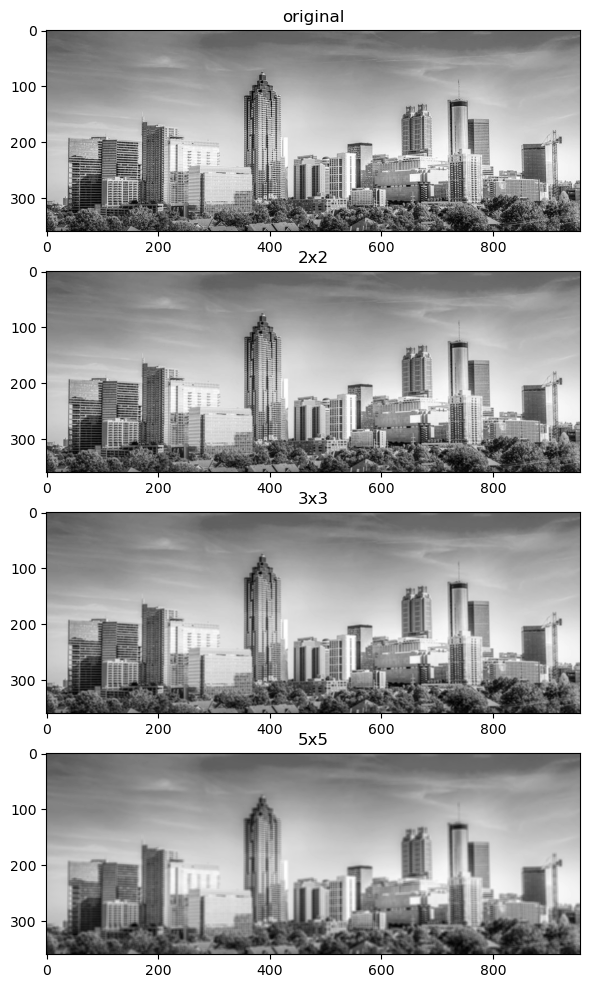

In [6]:
# Create a custom kernel for blurring

# 2x2 kernel for averaging blurring 
S2x2 = np.array([[ 1, 1], 
                 [ 1, 1]])

# 3x3 kernel
S3x3 = np.array([[1, 1, 1], 
                 [1, 1, 1], 
                 [1, 1, 1]])
# 5x5 kernel
S5x5 = np.array([[1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1]])


fig = plt.figure(figsize=(48, 12))
fig.add_subplot(4,1,1)
plt.imshow(gray, cmap='gray')
plt.title('original')

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel) 
#divide by 4 to normalize, ensures kernel elements equals thereby maintains the overall brightness
blurred_image = cv2.filter2D(gray, -1, S2x2/4.0)  
fig.add_subplot(4,1,2)
plt.imshow(blurred_image, cmap='gray')
plt.title('2x2')

# TODO: blur image using a 3x3 average
blurred_image_3x3 = cv2.filter2D(gray, -1, S3x3/9.0) 
fig.add_subplot(4,1,3)
plt.imshow(blurred_image_3x3, cmap='gray')
plt.title('3x3')

# TODO: blur image using a 5x5 average
blurred_image_5x5 = cv2.filter2D(gray, -1, S5x5/25.0)
fig.add_subplot(4,1,4)
plt.imshow(blurred_image_5x5, cmap='gray')
plt.title('5x5')

plt.show()

### TODO

Other image processing/filtering you can try:
- Other Edge Detector (e.g. Sobel Operator)
A common 3×3 kernel for edge detection is the **Sobel operator**, which detects edges in a specific direction. Below are the Sobel kernels for detecting vertical and horizontal edges:

**Vertical Edge Detection Kernel:**
> $
K_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$

**Horizontal Edge Detection Kernel:**
> $
K_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$

These kernels are convolved with an image to highlight vertical and horizontal edges, respectively.

- Corner Detection (use the kernels we discussed in slides)
- Scaling (after the blurring, can you pick one pixel out of the following?)
  - 2x2
  - 4x4
- Use other images of your choice
- For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

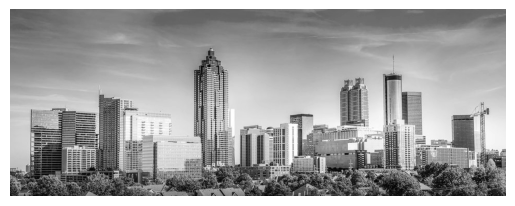

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
#defining sobel kernels
#vertical
K_x = np.array([[-1, 0, 1], 
                [-2, 0, 2], 
                [-1, 0, 1]])

#horizontal
K_y = np.array([[-1, -2, -1], 
                [ 0,  0,  0], 
                [ 1,  2,  1]])


In [9]:
#now that sobel is defined, i apply edge detection
#vertical detection
vertical_edges = cv2.filter2D(gray, -1, K_x)
horizontal_edges = cv2.filter2D(gray, -1, K_y)

Text(0.5, 1.0, 'Sobel vertical')

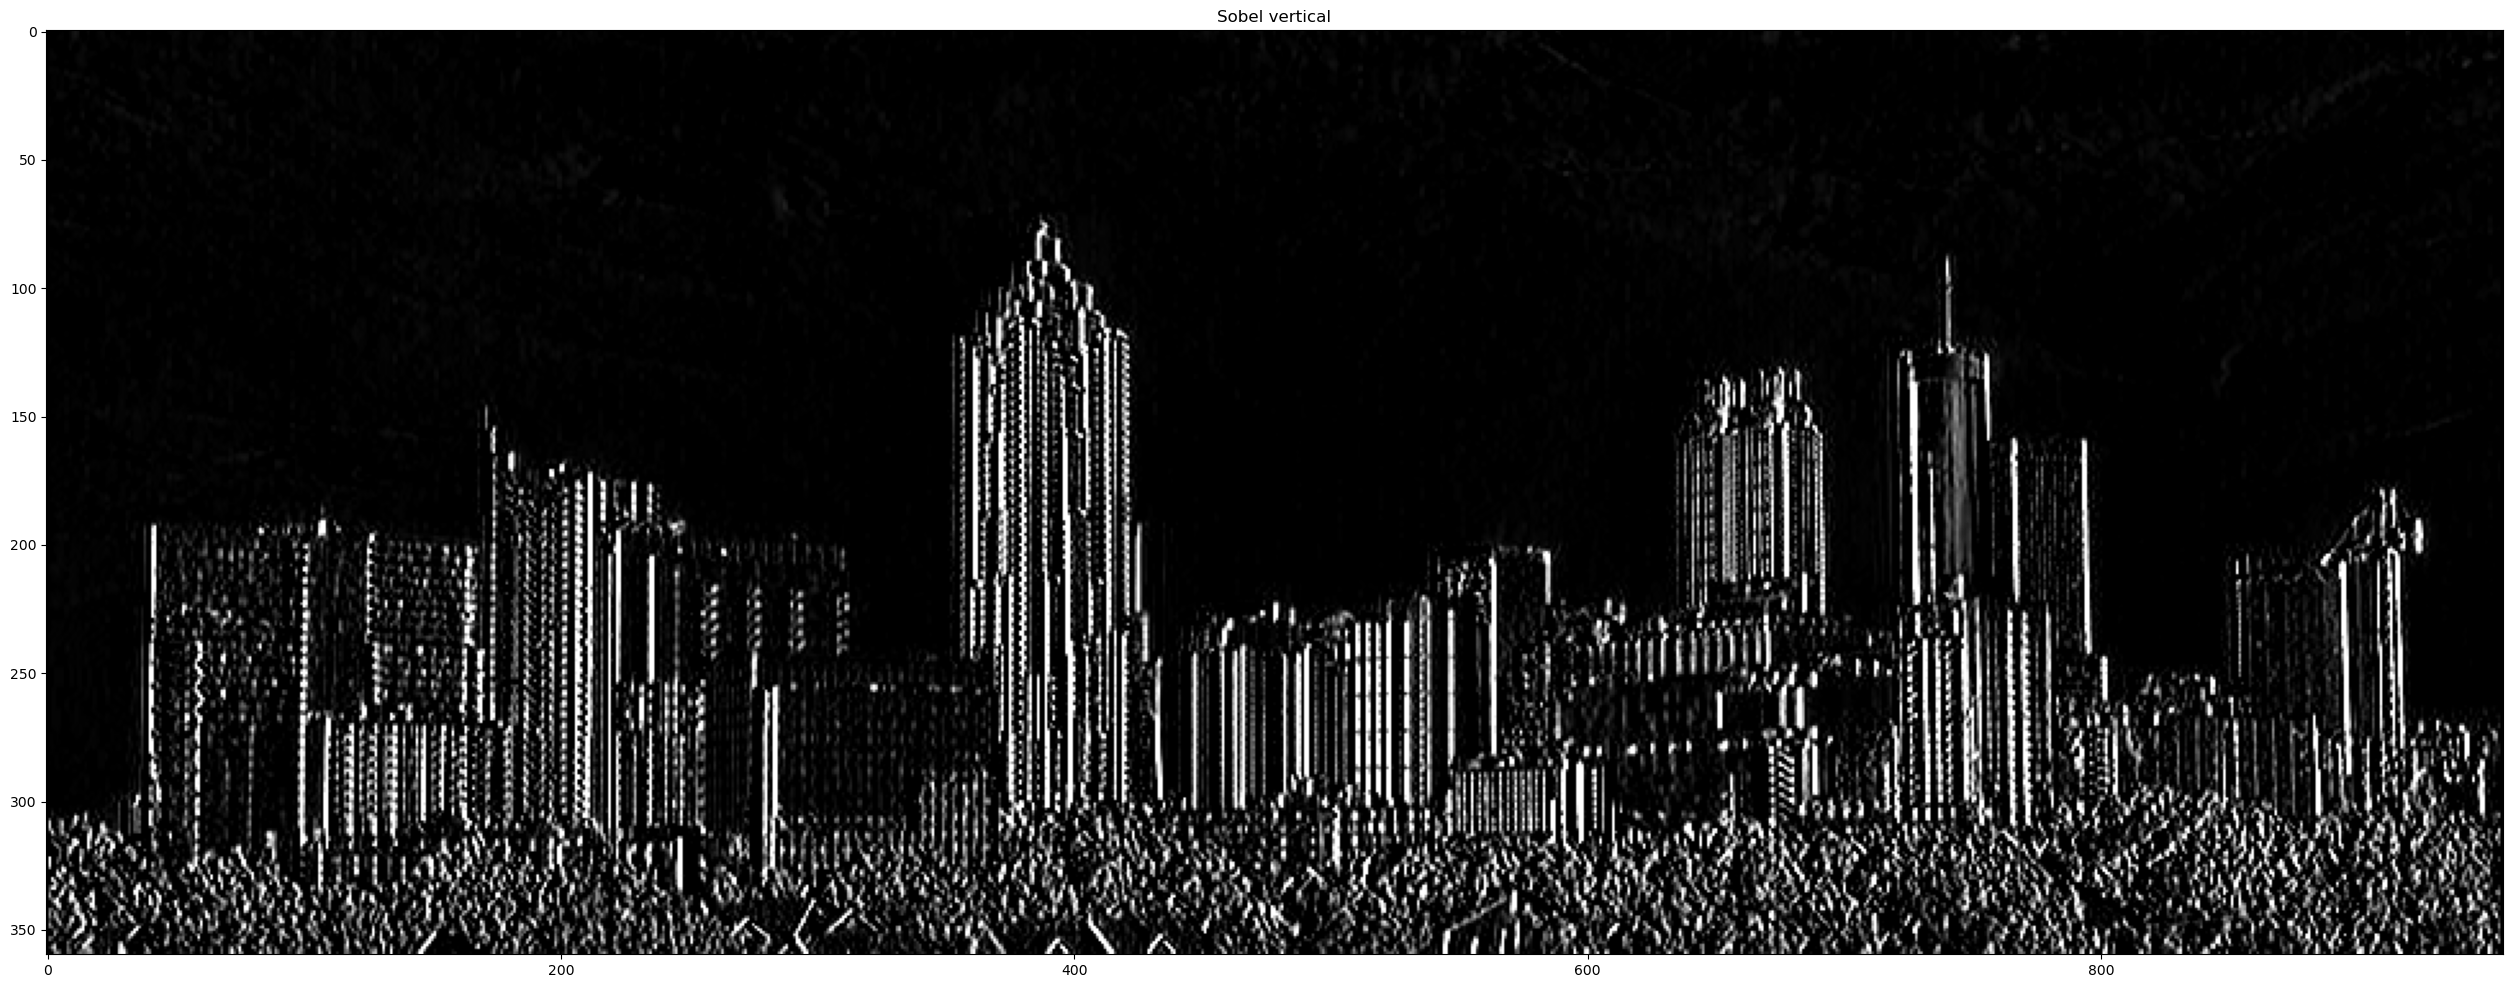

In [10]:
#sobel vertical

fig = plt.figure(figsize=(48, 12))
plt.imshow(vertical_edges, cmap='gray')
plt.title('Sobel vertical')

Text(0.5, 1.0, 'Sobel horizontal')

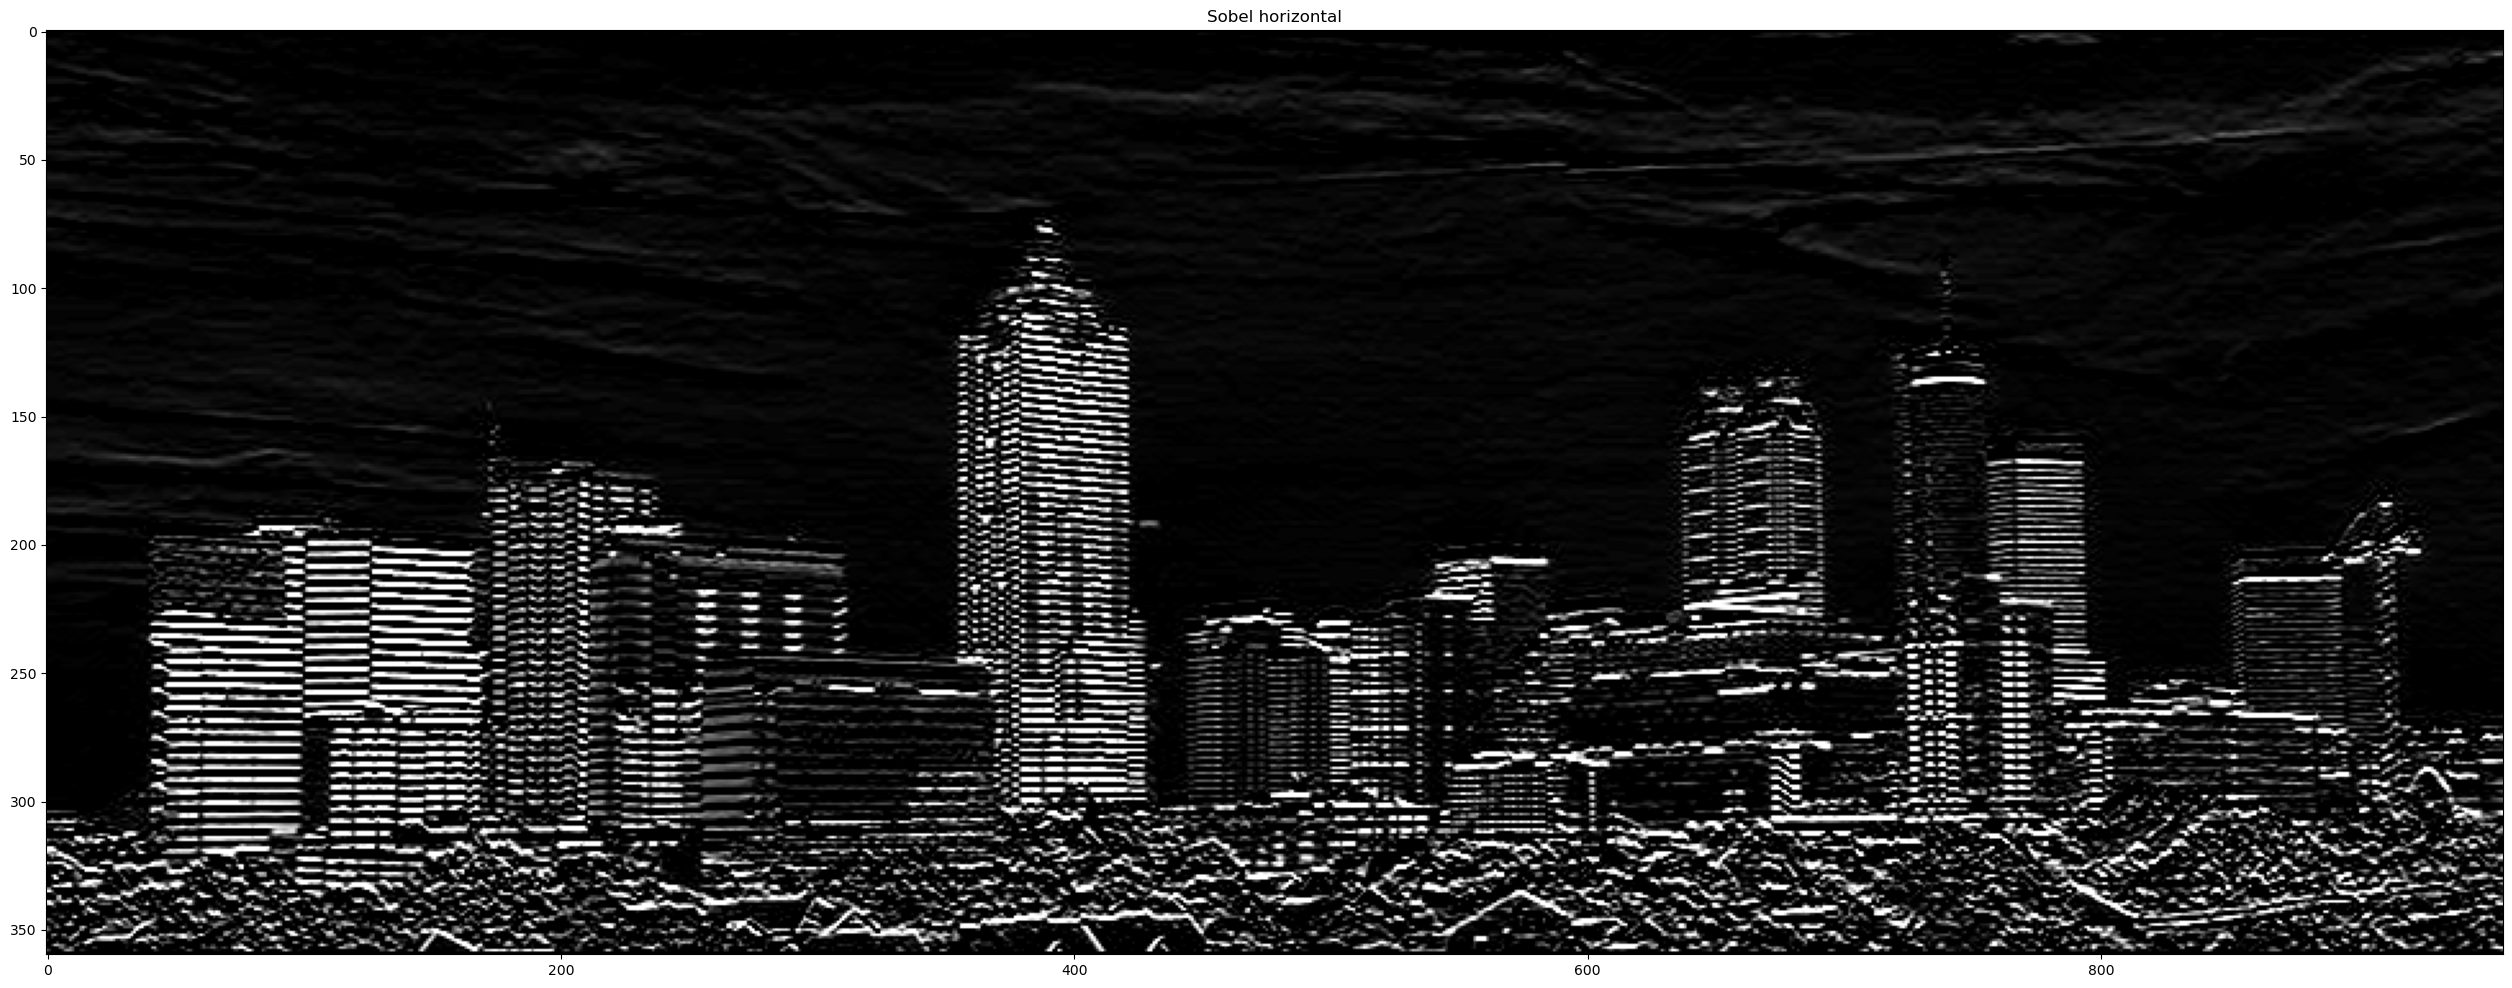

In [11]:
#sobel horizontal
fig = plt.figure(figsize=(48, 12))
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Sobel horizontal')

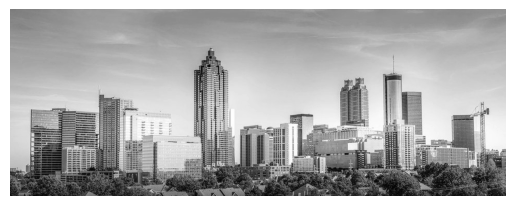

In [94]:
#Now work on corner detection 
# https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
# cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	) ->	dst

#load and convert image to gray
image=cv2.imread('building2-Copy1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(np.float32)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

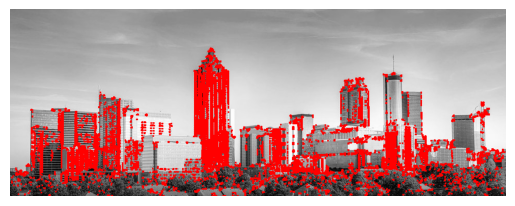

In [104]:
# #using cv2.cornerHarris

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)  

gray = cv2.cvtColor(np.uint8(gray), cv2.COLOR_GRAY2RGB)

# Mark detected corners in red
gray[dst > 0.01 * dst.max()] = [255, 0, 0]  # Red color in (B, G, R)

# Display the grayscale image with red corners
plt.imshow(gray)
plt.axis('off')
plt.show()


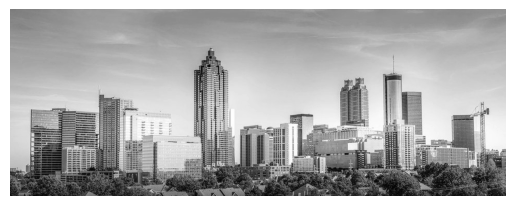

In [86]:
#corner detection using lecture slide example kernels.
#load image, define kernels for top right and left as well as bottopm right and left corners,
# apply each kernel using conv, ad threshold to detect strong corners, display the corners.
image=cv2.imread('building2-Copy1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(np.float32)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

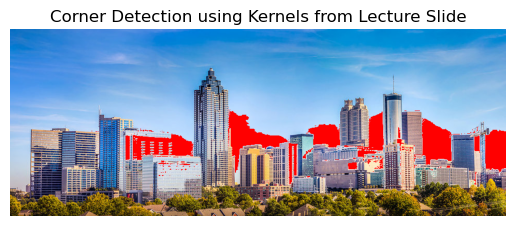

In [112]:
#defining kernels
kernels = [
    np.array([[1,  1,  0], 
              [0,  1,  1], 
              [0,  0,  0]], dtype=np.float32),

    np.array([[1,  1,  0], 
              [1,  1,  0], 
              [0,  0,  0]], dtype=np.float32),

    np.array([[0,  0,  0], 
              [1,  1,  0], 
              [0,  1,  1]], dtype=np.float32),

    np.array([[0,  0,  0], 
              [0,  1,  1], 
              [1,  1,  1]], dtype=np.float32),
]

corner_response = np.zeros_like(gray)

# filter2d for each kernel
for kernel in kernels:
    response = cv2.filter2D(gray, -1, kernel)
    corner_response = np.maximum(corner_response, response) 
    
#thershold for string corner detection
threshold = 0.9 * corner_response.max()
corners = (corner_response > threshold).astype(np.uint8) * 255  

image[corners > 0] = [0, 0, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Corner Detection using Kernels from Lecture Slide")
plt.show()

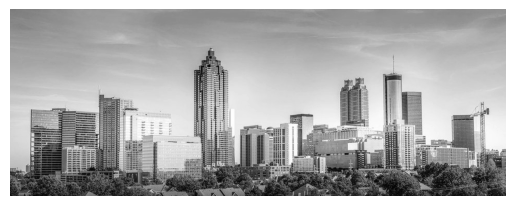

In [109]:
#scalling(after the blurring, can you pick one pixel out of the following?)
#steps: load the image, blur 
image=cv2.imread('building2-Copy1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(np.float32)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

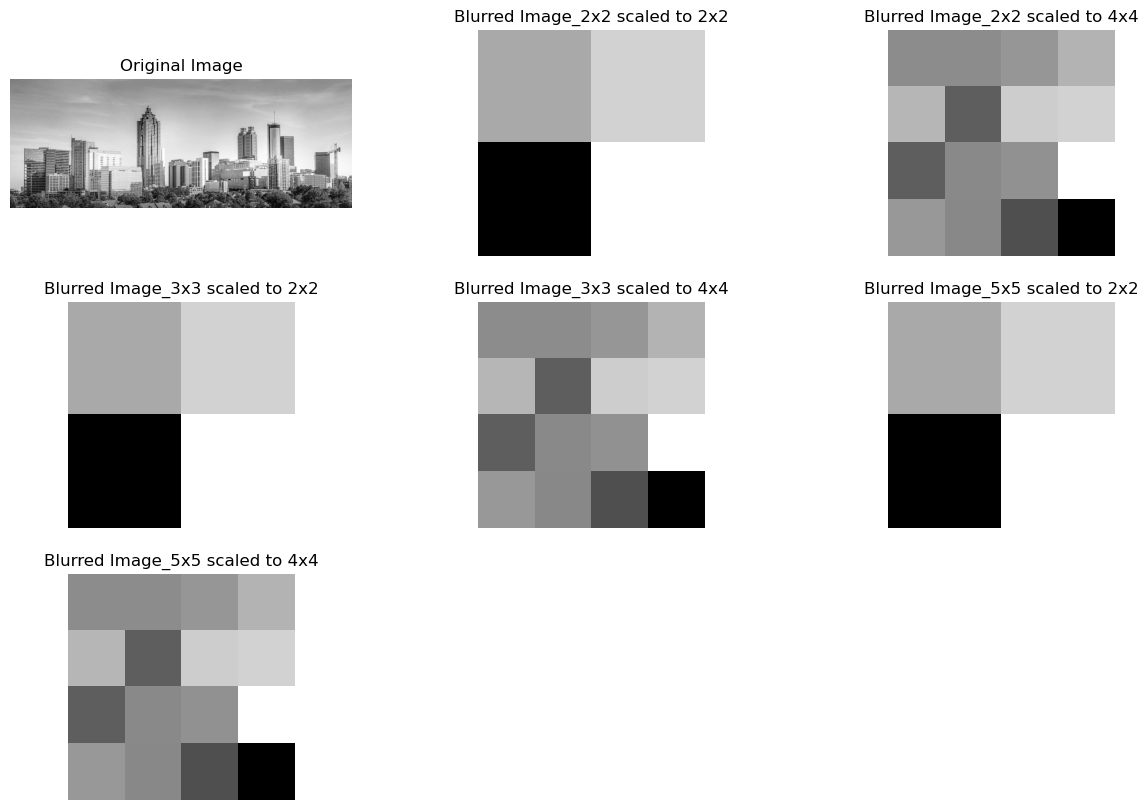

In [51]:
#BLUR THE IMAGE (reusing the code from above)
# 2x2 kernel for averaging blurring 
# Create a custom kernel for blurring

# 2x2 kernel for averaging blurring 
S2x2 = np.array([[ 1, 1], 
                 [ 1, 1]])

# 3x3 kernel
S3x3 = np.array([[1, 1, 1], 
                 [1, 1, 1], 
                 [1, 1, 1]])
# 5x5 kernel
S5x5 = np.array([[1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1], 
                 [1, 1, 1, 1, 1]])

blurred_2x2 = cv2.filter2D(gray, -1, S2x2/4.0)  
blurred_3x3 = cv2.filter2D(gray, -1, S3x3/9.0) 
blurred_5x5 = cv2.filter2D(gray, -1, S5x5/25.0)

#Now we scale each of the above blurred images to 2x2 and 4x4 as per TODO
# use cv2.resize(source, dsize, dest, fx, fy, interpolation)
#assume x=scaling to 2x2 and y=scaling to 4x4
x_blurred_2x2= cv2.resize(blurred_2x2, (2, 2), interpolation=cv2.INTER_LINEAR)
y_blurred_2x2= cv2.resize(blurred_2x2, (4, 4), interpolation=cv2.INTER_LINEAR)

x_blurred_3x3= cv2.resize(blurred_2x2, (2, 2), interpolation=cv2.INTER_LINEAR)
y_blured_3x3= cv2.resize(blurred_2x2, (4, 4), interpolation=cv2.INTER_LINEAR)

x_blurred_5x5= cv2.resize(blurred_2x2, (2, 2), interpolation=cv2.INTER_LINEAR)
y_blurred_5x5= cv2.resize(blurred_2x2, (4, 4), interpolation=cv2.INTER_LINEAR)


# Display

fig = plt.figure(figsize=(15, 10))

# Original Image
fig.add_subplot(3, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

fig.add_subplot(3, 3, 2)
plt.imshow(x_blurred_2x2, cmap='gray')
plt.title('Blurred Image_2x2 scaled to 2x2')
plt.axis('off')

fig.add_subplot(3, 3, 3)
plt.imshow(y_blurred_2x2, cmap='gray')
plt.title('Blurred Image_2x2 scaled to 4x4')
plt.axis('off')

fig.add_subplot(3, 3, 4)
plt.imshow(x_blurred_3x3, cmap='gray')
plt.title('Blurred Image_3x3 scaled to 2x2')
plt.axis('off')

fig.add_subplot(3, 3, 5)
plt.imshow(y_blurred_3x3, cmap='gray')
plt.title('Blurred Image_3x3 scaled to 4x4')
plt.axis('off')

fig.add_subplot(3, 3, 6)
plt.imshow(x_blurred_5x5, cmap='gray')
plt.title('Blurred Image_5x5 scaled to 2x2')
plt.axis('off')

fig.add_subplot(3, 3, 7)
plt.imshow(y_blurred_5x5, cmap='gray')
plt.title('Blurred Image_5x5 scaled to 4x4')
plt.axis('off')
plt.show()




In [53]:
# Use other images of your choice
# For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), 
# and then one that detects the edges.

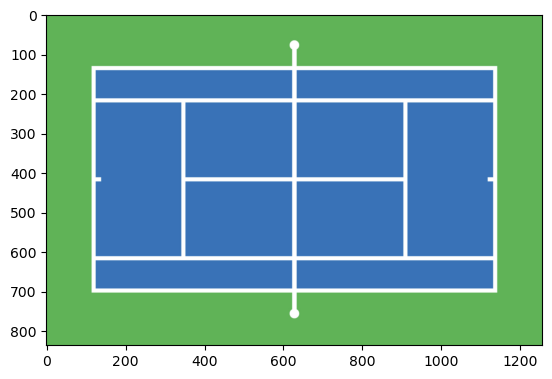

In [61]:
image_2 = cv2.imread('OtherImage.jpg') 
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)

In [56]:
#NOW I WILL PERFORM A SERIES OF FILTERS ON THIS IMAGE


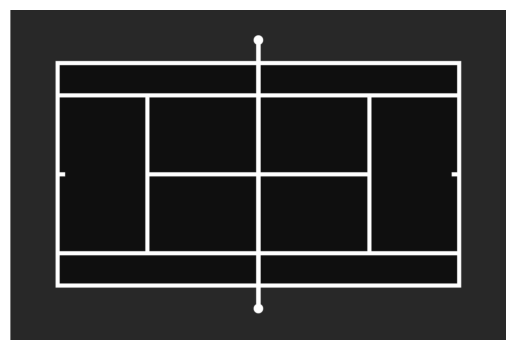

In [69]:
#1. corner detection using openCV Shi-Tomasi https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html
img = cv2.imread('OtherImage.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.float32)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

/var/folders/rc/7hcf34jn40g30rgtz1vjrrnw0000gn/T/ipykernel_24281/1412757133.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


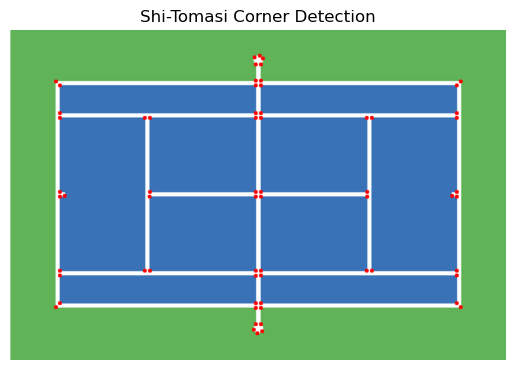

In [71]:
#https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541

corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Mark the detected corners on the original image
for i in corners:
    x, y = i.ravel()
    cv2.circle(image_rgb, (x, y), 5, (255, 0, 0), -1)

# Display the image with detected corners
plt.imshow(image_rgb)
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")
plt.show()


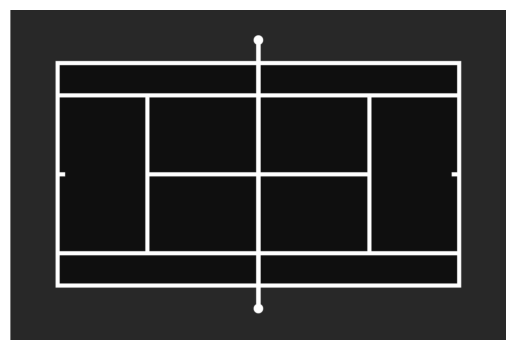

In [73]:
#2. Blurring this Image but instead of using custom kernels i will try using OpenCV fucntion blur()
#https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37
img = cv2.imread('OtherImage.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.float32)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

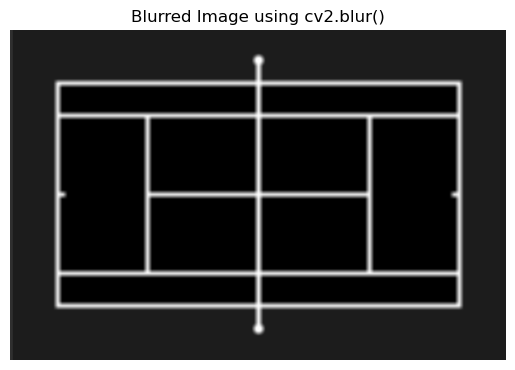

In [80]:
blurred = cv2.blur(gray, (12, 12))
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title("Blurred Image using cv2.blur()")
plt.show()

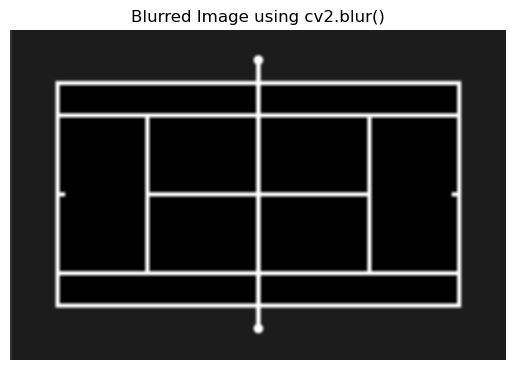

In [79]:
blurred = cv2.blur(gray, (9, 9))
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title("Blurred Image using cv2.blur()")
plt.show()

In [81]:
#takes an average of pixels
#using OpneCV mean()
# https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga191389f8a0e58180bb13a727782cd461
mean_value = cv2.mean(gray)

print("Mean Pixel Value of the Image:", mean_value[0])

Mean Pixel Value of the Image: 143.39767489257306
